In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain1.csv') 
data.columns

Index(['dn', 'contract_id', 'produit', 'full_vol', 'full_secteur', 'full_city',
       'source', 'unit', 'a_own', 'b_number', 'duration', 'num_interactions',
       'num_interactions_sms', 'offnet', 'communaute', 'duration_wh',
       'num_interactions_wh', 'num_interactions_sms_wh'],
      dtype='object')

In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sélection des colonnes pertinentes
selected_columns = ['produit','full_vol', 'full_secteur', 'full_city', 'source', 'a_own','duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh','duration', 'num_interactions', 'num_interactions_sms', 'communaute']

# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Définition des valeurs de K que nous voulons tester
k_values = range(5, 21)

# Liste pour stocker les scores des silhouettes pour chaque K
silhouette_scores = []

# Boucle sur les différentes valeurs de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Tracé des scores des silhouettes en fonction de K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K pour K-means++')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(

KeyboardInterrupt



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = ['produit','full_vol', 'full_secteur', 'full_city', 'source', 'a_own','duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh','duration', 'num_interactions', 'num_interactions_sms', 'communaute']

# Nombre de clusters souhaités
num_clusters = 15

# Créer un modèle KMeans avec seeding K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Appliquer le clustering sur les données
data['cluster'] = kmeans.fit_predict(data[features])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


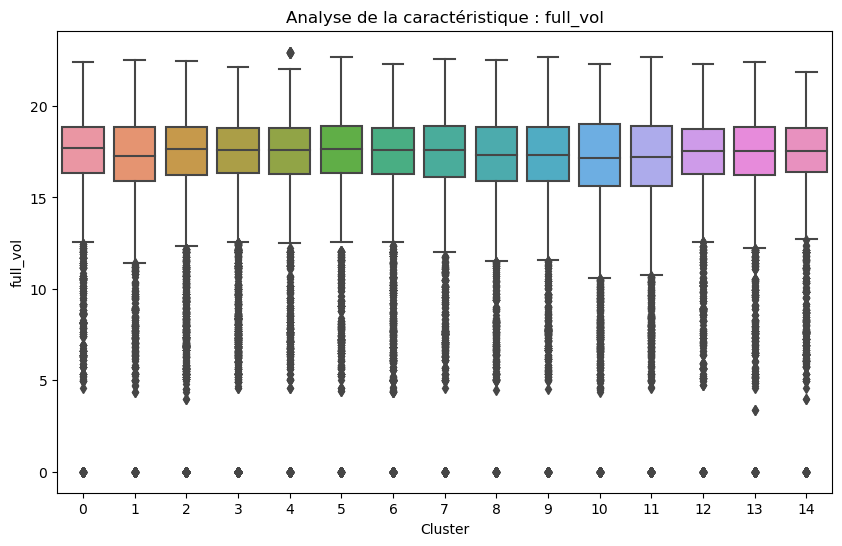

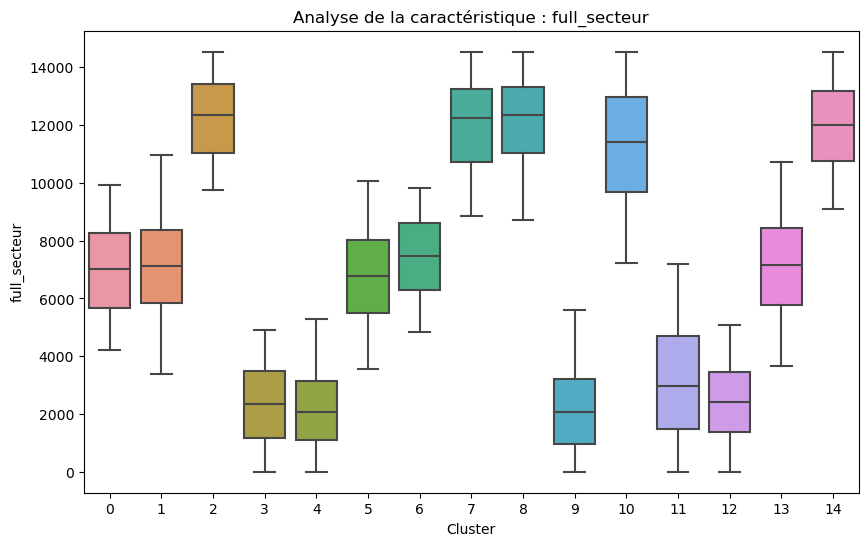

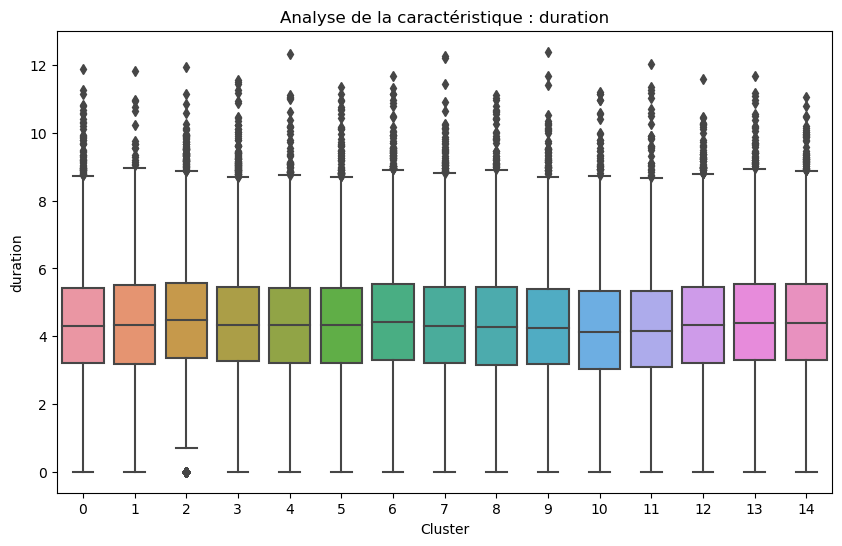

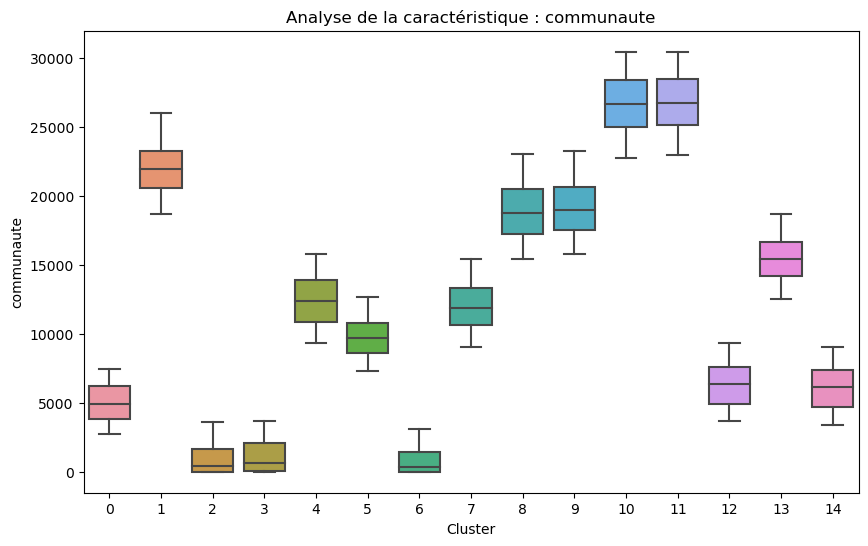

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle 'data' et vous avez déjà ajouté la colonne 'cluster'
# et effectué le K-means clustering

# Créer un sous-ensemble de données avec seulement les caractéristiques utilisées pour le clustering
cluster_features = ['full_vol', 'full_secteur','duration','communaute']
cluster_data = data[cluster_features + ['cluster']]

# Créer des graphiques pour chaque caractéristique
for feature in cluster_features:
    plt.figure(figsize=(10, 6))
    
    # Utiliser Seaborn pour créer un graphique de boîte à moustaches par caractéristique
    sns.boxplot(x='cluster', y=feature, data=cluster_data)
    
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Analyse de la caractéristique : {feature}')
    
    plt.show()


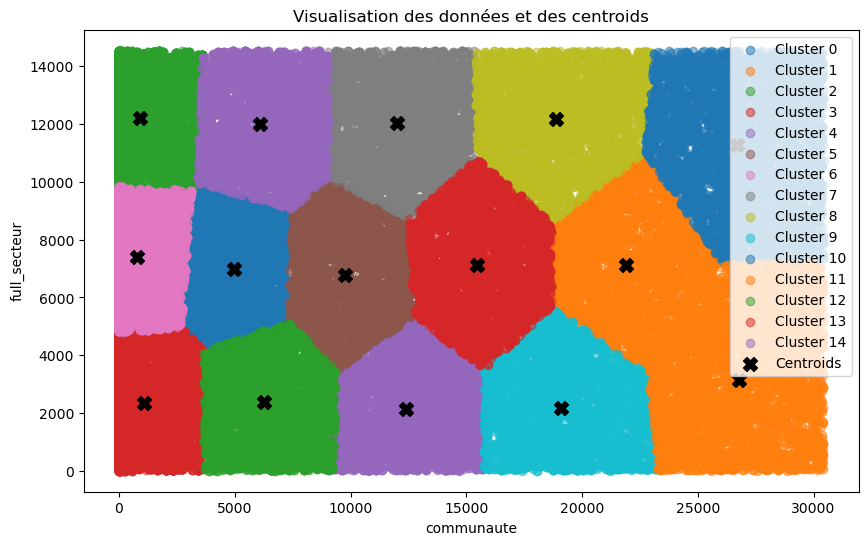

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supposons que votre DataFrame s'appelle 'data' et vous avez déjà ajouté la colonne 'cluster'
# et effectué le K-means clustering

# Calculer les centroids pour chaque cluster
centroids = data.groupby('cluster').mean()

# Créer un diagramme de dispersion pour visualiser les données et les centroids
plt.figure(figsize=(10, 6))

# Afficher les données de chaque cluster avec des couleurs différentes
for cluster_id in range(len(centroids)):
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['communaute'], cluster_data['full_secteur'], label=f'Cluster {cluster_id}', alpha=0.5)

# Afficher les centroids avec des couleurs différentes
plt.scatter(centroids['communaute'], centroids['full_secteur'], color='black', marker='X', s=100, label='Centroids')

# Ajouter des étiquettes et une légende
plt.xlabel('communaute')
plt.ylabel('full_secteur')
plt.title('Visualisation des données et des centroids')
plt.legend()

# Afficher le graphique
plt.show()


In [8]:
from sklearn.metrics import davies_bouldin_score

labels = data['cluster'].values
data1 = data.drop(columns=['cluster'])
davies_bouldin_coefficient = davies_bouldin_score(data1.values, labels)

print(f"Coefficient de Davies-Bouldin : {davies_bouldin_coefficient}")

Coefficient de Davies-Bouldin : 10.741351233121575


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Le score de silhouette moyen est : 0.39273040086862454


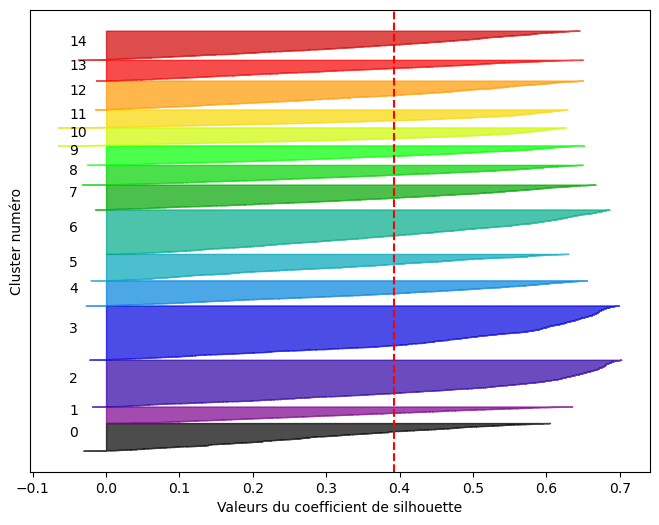

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = ['produit','full_vol', 'full_secteur', 'full_city', 'source', 'duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh','duration', 'num_interactions', 'num_interactions_sms', 'communaute']

# Nombre de clusters souhaités
num_clusters = 15

# Créer un modèle KMeans avec seeding K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Appliquer le clustering sur les données
data['cluster'] = kmeans.fit_predict(data[features])
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(data[features], data['cluster'])
print("Le score de silhouette moyen est :", silhouette_avg)

# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(data[features], data['cluster'])

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[data['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()

In [9]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import numpy as np

# Charger vos données depuis le fichier ou la source appropriée
# data = pd.read_csv('votre_fichier.csv')

# Sélectionner les colonnes pertinentes pour le clustering
X = data[['full_vol', 'full_secteur', 'full_city', 'source', 'unit', 'b_number', 'duration', 'num_interactions', 'num_interactions_sms', 'offnet', 'communaute']]

# Récupérer les étiquettes de cluster à partir de la colonne existante
cluster_labels = data['cluster']

# Calculer les distances intra-cluster pour chaque échantillon
inertia = 0.0
for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_data = X.iloc[cluster_indices]
    cluster_center = cluster_data.mean(axis=0)
    cluster_distance = pairwise_distances(cluster_data, [cluster_center], metric='euclidean')
    inertia += np.sum(cluster_distance ** 2)

# Afficher le résultat
print("Inertia (Inertie intra-cluster) :", inertia)


Inertia (Inertie intra-cluster) : 68925181860475.44


In [10]:
from sklearn.metrics import calinski_harabasz_score

# Supposons que data['cluster'] contienne les étiquettes de cluster pour chaque échantillon
cluster_labels = data['cluster']

# Supposons également que vous avez vos données dans un format approprié, par exemple data_features
data_features = X

# Calcul du score Calinski-Harabasz
calinski_score = calinski_harabasz_score(data_features, cluster_labels)

print("Calinski-Harabasz Score:", calinski_score)


Calinski-Harabasz Score: 912.6444566760653


In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances


# Sélectionnez les colonnes de vos caractéristiques (attributs)
features = data.drop('cluster', axis=1)

# Sélectionnez la colonne de clusters
clusters = data['cluster']

# Calculer les centroïdes de chaque cluster
centroids = features.groupby(clusters).mean()

# Calculer les distances entre chaque point et le centroïde de son cluster
distances = pairwise_distances(features, centroids, metric='euclidean')

# Calculer le WCSS en prenant la somme des carrés des distances
wcss = np.sum(distances**2)

print("WCSS pour 7 clusters:", wcss)


WCSS pour 7 clusters: 793291033999807.8


In [20]:
wcss7 = 793291033999807.8
wcss14 = 1586491334964417.0
wscc_pca = 658598953184123.9

min_value = min(wcss7, wcss14, wscc_pca)

if min_value == wcss7:
    print("La variable minimale est wcss7")
elif min_value == wcss14:
    print("La variable minimale est wcss14")
else:
    print("La variable minimale est wscc_pca")


La variable minimale est wscc_pca


In [9]:
data.to_csv("C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain_kmeans++.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances


# Sélectionnez les colonnes de vos caractéristiques (attributs)
features = data.drop('cluster', axis=1)

# Sélectionnez la colonne de clusters
clusters = data['cluster']

# Calculer les centroïdes de chaque cluster
centroids = features.groupby(clusters).mean()

# Calculer les distances entre chaque point et le centroïde de son cluster
distances = pairwise_distances(features, centroids, metric='euclidean')

# Calculer le WCSS en prenant la somme des carrés des distances
wcss = np.sum(distances**2)

print("WCSS pour 15 clusters:", wcss)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = ['produit','full_vol', 'full_secteur', 'full_city', 'source', 'a_own','duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh','duration', 'num_interactions', 'num_interactions_sms', 'communaute']

# Nombre de clusters souhaités
num_clusters = 7

# Créer un modèle KMeans avec seeding K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Appliquer le clustering sur les données
data['cluster'] = kmeans.fit_predict(data[features])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Le score de silhouette moyen est : 0.40864673873048935


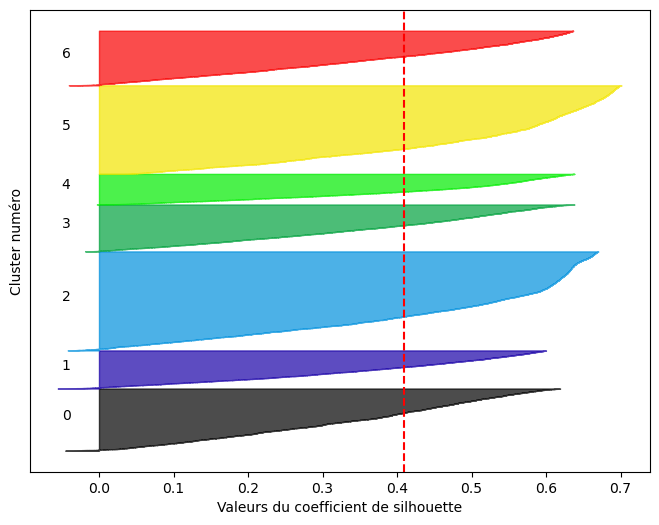

In [12]:
#pour7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(data[features], data['cluster'])
print("Le score de silhouette moyen est :", silhouette_avg)

# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(data[features], data['cluster'])

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[data['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()